In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn

from experiments.libs import loaders
%matplotlib inline

![diagram of layour](img/picture.png)

In [2]:
df = loaders.load_iot()

In [3]:
df.head()

,rcdminutes,temperature,humidity,light,voltage,class
0,58.0,19.7336,37.0933,71.76,2.69964,19
1,58.0,19.6160,37.5737,97.52,2.69964,25
2,58.0,19.7728,37.1620,143.52,2.71196,24
3,58.0,20.2040,36.8871,50.60,2.69964,3
4,58.0,20.4196,36.6118,121.44,2.65143,6


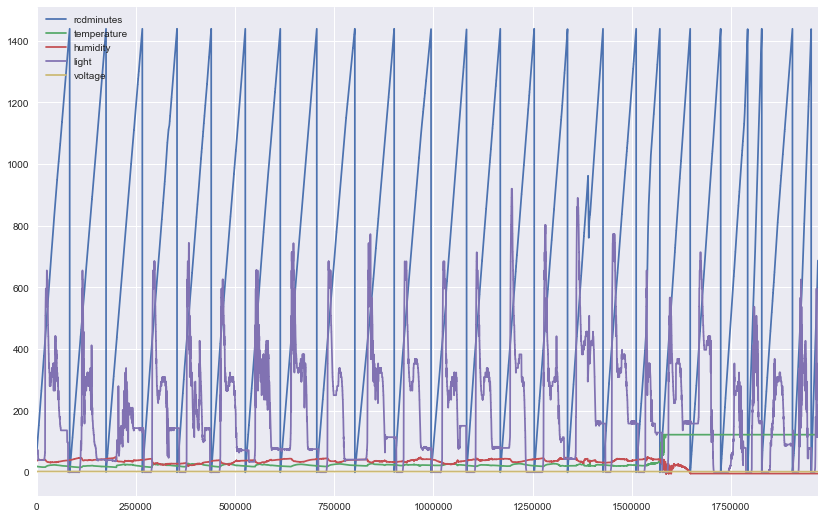

In [4]:
df[df['class']=='19'].plot(figsize=(14, 9))

Previous exploration demonstrated that we could predict the following aread with high accuracy:
58    0.897977
56    0.845028
55    0.740215

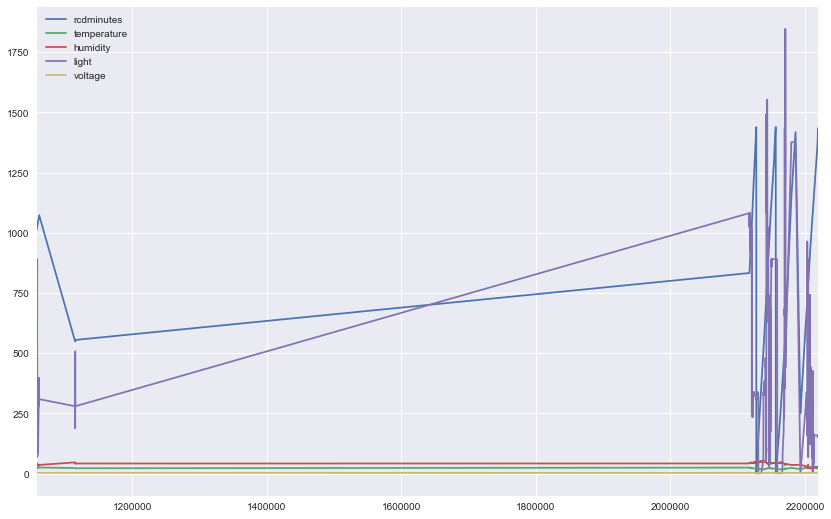

In [5]:
df[df['class']=='55'].plot(figsize=(14, 9))

So any analysis should exclude them

In [6]:
df.set_index('class', append=True)

,,rcdminutes,temperature,humidity,light,voltage
,class,,,,,
0,19,58.0,19.7336,37.0933,71.76000,2.69964
1,25,58.0,19.6160,37.5737,97.52000,2.69964
2,24,58.0,19.7728,37.1620,143.52000,2.71196
3,3,58.0,20.2040,36.8871,50.60000,2.69964
4,6,58.0,20.4196,36.6118,121.44000,2.65143
5,26,58.0,19.4494,39.6200,121.44000,2.69964
6,27,58.0,20.1354,37.1620,79.12000,2.71196
7,31,58.0,19.5572,39.0763,150.88000,2.69964
8,34,58.0,19.4298,39.0763,60.72000,2.68742


In [7]:
df2=_

In [8]:
df3=df2.unstack(level=1)

In [9]:
df3.head()

rcdminutes                                     ... voltage              \
class          1  10  11  12  13  14  15  16  17  18 ...      52  53  54  55   
0            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...     NaN NaN NaN NaN   
1            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...     NaN NaN NaN NaN   
2            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...     NaN NaN NaN NaN   
3            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...     NaN NaN NaN NaN   
4            NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...     NaN NaN NaN NaN   

                                    
class  56  58        6   7   8   9  
0     NaN NaN      NaN NaN NaN NaN  
1     NaN NaN      NaN NaN NaN NaN  
2     NaN NaN      NaN NaN NaN NaN  
3     NaN NaN      NaN NaN NaN NaN  
4     NaN NaN  2.65143 NaN NaN NaN  

[5 rows x 275 columns]

In [28]:
df4 = df3.ffill().bfill()

In [29]:
df4.head(50)

rcdminutes                                                        \
class          1    10    11    12    13    14    15    16    17    18   
0           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
1           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
2           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
3           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
4           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
5           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
6           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
7           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
8           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
9           59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
10          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
11          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
12          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
13          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
14          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
15          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
16          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
17          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
18          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
19          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
20          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
21          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
22          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
23          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
24          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
25          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
26          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
27          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
28          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
29          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
30          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  59.0   
31          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
32          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
33          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
34          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
35          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
36          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
37          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
38          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
39          59.0  60.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
40          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
41          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
42          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
43          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
44          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
45          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
46          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
47          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
48          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   
49          59.0  61.0  62.0  59.0  72.0  65.0  67.0  61.0  69.0  60.0   

        ...     voltage                                                        \
class   ...          52       53       54       55       56       58        

In [48]:
corr_matrix = df4.loc[:, ('voltage', slice(None))].corr()

In [49]:
from matplotlib import pyplot as plt

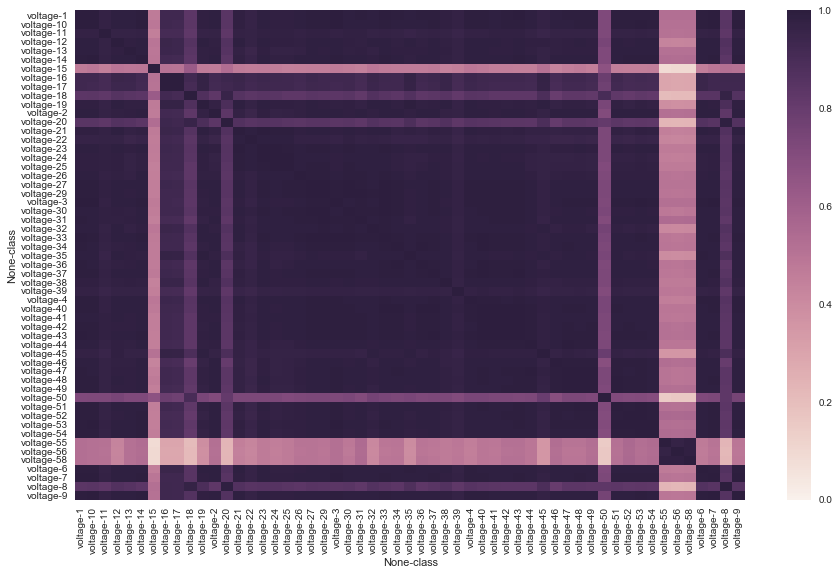

In [50]:
plt.figure(figsize=(15,9))
ax = seaborn.heatmap(corr_matrix, vmin=0, vmax=1)

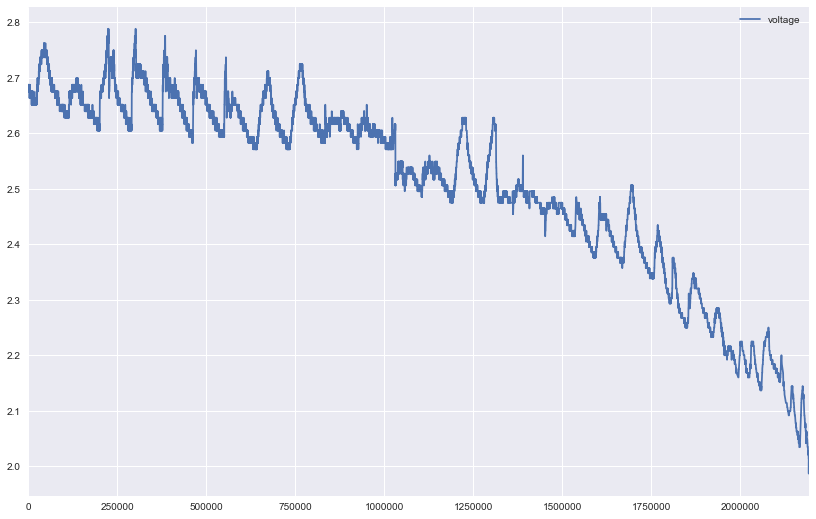

In [58]:
df[df['class']=='42'][[ 'voltage']].plot(figsize=(14, 9))

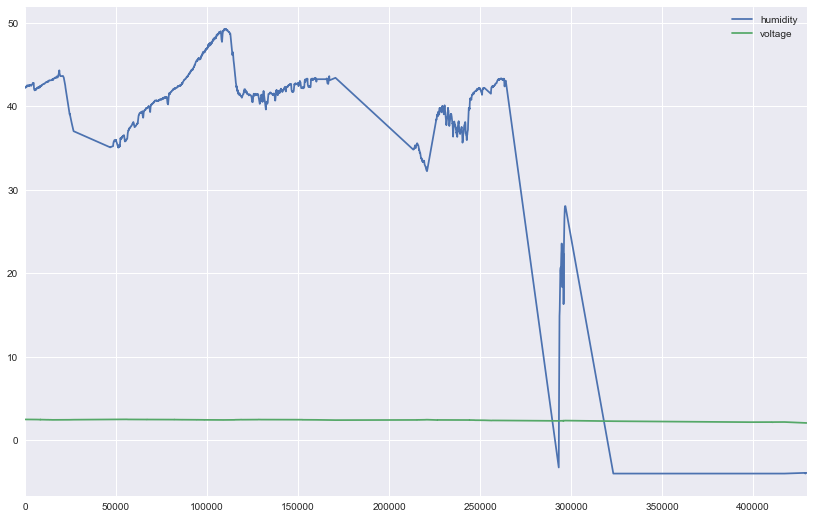

In [52]:
df[df['class']=='15'][['humidity', 'voltage']].plot(figsize=(14, 9))